# Techinical Data Assessment

This technical data assessment is based on the City of Houston electricity bill dataset. I converted the Excel sheet downloaded into a CSV file and all analysis in this notebook comes from the file. This notebook is coded with Python.

There are three parts in this notebook.
* Part 1: overview of the dataset given.
* Part 2: answering questions 1 & 2.
* Part 3: exploring the dataset and giving other insights.

## 1. Overview of the City of Houston Electricity Bill Dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
bills = pd.read_csv('COH+EE+Bills+July+2016+-June+2017.csv')
bills.head()

/Users/MacBook/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Reliant Contract No,Service Address,ESID,Business Area,Fund,Cost Center,Bill Type,Bill Date,Meter No,Meter Read,Read Date,Due Date,Base Cost ($),Total T&D Charges ($),Current Due ($),Index Charge ($),Total Due ($),Franchise Fee ($),Voucher Date,Billed Demand (KVA),kWh Usage,Nodal Cu Charge ($),Adder Charge ($)
0,20293,3300 SAN FELIPE,1008901006120966305100,2000,1000,2000050002,T,07/07/2016,I65891140,"19,581",07/01/2016,08/06/2016,$11.13,$18.00,$31.02,$0.00,$31.02,-$0.59,07/21/2016,0,273,$1.25,$0.00
1,20293,3300 SAN FELIPE,1008901006120966305100,2000,1000,2000050002,T,08/08/2016,I65891140,"19,885",08/02/2016,09/07/2016,$9.71,$18.98,$29.43,$0.00,$29.43,-$0.66,08/23/2016,0,304,$0.14,$0.00
2,20293,3300 SAN FELIPE,1008901006120966305100,2000,1000,2000050002,T,09/07/2016,I65891140,"20,158",08/31/2016,10/07/2016,$8.67,$18.00,$27.43,$0.00,$27.43,-$0.59,09/22/2016,0,273,$0.20,$0.00
3,20293,3300 SAN FELIPE,1008901006120966305100,2000,1000,2000050002,T,10/05/2016,I65891140,"20,440",09/30/2016,11/04/2016,$8.95,$18.60,$28.22,$0.00,$28.22,-$0.61,10/20/2016,0,282,$0.10,$0.00
4,20293,3300 SAN FELIPE,1008901006120966305100,2000,1000,2000050002,T,11/04/2016,I65891140,"20,730",10/31/2016,12/04/2016,$9.20,$18.33,$28.21,$0.00,$28.21,-$0.63,11/18/2016,0,290,$0.11,$0.00


In [3]:
bills.shape

(67620, 23)

In [4]:
print ('There are %d lines and %d columns in this dataset.'%(bills.shape[0], bills.shape[1]))

There are 67620 lines and 23 columns in this dataset.


In [5]:
# trim column names
columns = bills.columns
bills.columns = columns.str.strip()
bills.columns

Index(['Reliant Contract No', 'Service Address', 'ESID', 'Business Area',
       'Fund', 'Cost Center', 'Bill Type', 'Bill Date', 'Meter No',
       'Meter Read', 'Read Date', 'Due Date', 'Base Cost ($)',
       'Total T&D Charges ($)', 'Current Due ($)', 'Index Charge ($)',
       'Total Due ($)', 'Franchise Fee ($)', 'Voucher Date',
       'Billed Demand (KVA)', 'kWh Usage', 'Nodal Cu Charge ($)',
       'Adder Charge ($)'],
      dtype='object')

In [6]:
bills.dtypes

Reliant Contract No      object
Service Address          object
ESID                     object
Business Area             int64
Fund                      int64
Cost Center               int64
Bill Type                object
Bill Date                object
Meter No                 object
Meter Read               object
Read Date                object
Due Date                 object
Base Cost ($)            object
Total T&D Charges ($)    object
Current Due ($)          object
Index Charge ($)         object
Total Due ($)            object
Franchise Fee ($)        object
Voucher Date             object
Billed Demand (KVA)      object
kWh Usage                object
Nodal Cu Charge ($)      object
Adder Charge ($)         object
dtype: object

## 2. Answer Questions 1 & 2

#### Question 1: How many sites (Service Address) does the City of Houston manage?

In [7]:
sites = bills['Service Address'].nunique()
print ('There are {} sites.'.format(sites))

There are 5611 sites.


Convert date columns to date type

In [8]:
date_columns = ['Bill Date', 'Read Date', 'Due Date']
for c in date_columns:
    bills[c] = pd.to_datetime(bills[c], format='%m/%d/%Y')

Convert money related columns to float

In [9]:
fee_columns = ['Base Cost ($)', 'Total T&D Charges ($)', 'Current Due ($)', 'Index Charge ($)', 
               'Total Due ($)', 'Franchise Fee ($)', 'Nodal Cu Charge ($)', 'Adder Charge ($)']
for c in fee_columns:
    bills[c] = bills[c].str.replace('$', '').str.replace(',', '')
    bills[c] = bills[c].astype(float)

Convert other number columns to float

In [10]:
num_columns = ['Meter Read', 'Billed Demand (KVA)', 'kWh Usage']
for c in num_columns:
    bills[c] = bills[c].str.replace(',', '')
    bills[c] = bills[c].astype(int)

In [11]:
bills.dtypes

Reliant Contract No              object
Service Address                  object
ESID                             object
Business Area                     int64
Fund                              int64
Cost Center                       int64
Bill Type                        object
Bill Date                datetime64[ns]
Meter No                         object
Meter Read                        int64
Read Date                datetime64[ns]
Due Date                 datetime64[ns]
Base Cost ($)                   float64
Total T&D Charges ($)           float64
Current Due ($)                 float64
Index Charge ($)                float64
Total Due ($)                   float64
Franchise Fee ($)               float64
Voucher Date                     object
Billed Demand (KVA)               int64
kWh Usage                         int64
Nodal Cu Charge ($)             float64
Adder Charge ($)                float64
dtype: object

#### Question 2: What is the median kWh usage and cost by site in this dataset?

In [12]:
kWh = bills[['Service Address', 'kWh Usage', 'Total Due ($)']]
kWh.head(15)

,Service Address,kWh Usage,Total Due ($)
0,3300 SAN FELIPE,273,31.02
1,3300 SAN FELIPE,304,29.43
2,3300 SAN FELIPE,273,27.43
3,3300 SAN FELIPE,282,28.22
4,3300 SAN FELIPE,290,28.21
5,3300 SAN FELIPE,291,27.89
6,3300 SAN FELIPE,321,29.55
7,3300 SAN FELIPE,276,26.56
8,3300 SAN FELIPE,272,21.46
9,3300 SAN FELIPE,287,22.44


In [13]:
kWh_groupby_site = kWh.groupby(['Service Address'], as_index=False).sum()
kWh_groupby_site.head()

,Service Address,kWh Usage,Total Due ($)
0,1 STREET LIGHT WAY (VARIOUS),29998,7136.61
1,100 1/2 A E 14TH ST,2206,245.28
2,100 1/2 DEERFIELD ST,8400,630.04
3,100 1/2 E 4TH STREET,147,111.97
4,100 1/5 E 3RD ST,11,18.58


In [14]:
usage_median, due_median = kWh_groupby_site.median()
print ('The median kWh usage is: %d.'%(usage_median))
print ('The median kWh cost is: $%.2f.'%(due_median))

The median kWh usage is: 2872.
The median kWh cost is: $283.54.


## 3. Explore dataset & Other Insights

### 3.1 kWh usage and cost by site

#### Top 10 sites of kWh usage 

In [15]:
kWh_groupby_site.sort_values(by=['kWh Usage'],ascending=False).head(10)

,Service Address,kWh Usage,Total Due ($)
2153,2500 FEDERAL RD,121636497,4358286.05
2152,2500 69TH ST,113451767,4053100.70
5610,VARIOUS,79449482,23332024.48
4773,7800 AIRPORT,54467415,2226242.13
2449,3100 GENOA RED BLUFF RD,53059362,1891089.78
1676,18401 JOHN F KENNEDY BLVD,39907440,1720608.61
858,12550 WATER WORKS WAY,36923689,1312911.46
3201,4501 BEECHNUT #C,35489503,1574459.10
2402,3005 GALVESTON,28060510,994189.92
794,12321 1/2 ALMEDA,26040411,1166166.64


#### Top 10 sites of kWh cost

In [16]:
kWh_groupby_site.sort_values(by=['Total Due ($)'],ascending=False).head(10)

,Service Address,kWh Usage,Total Due ($)
5610,VARIOUS,79449482,23332024.48
2153,2500 FEDERAL RD,121636497,4358286.05
2152,2500 69TH ST,113451767,4053100.70
4773,7800 AIRPORT,54467415,2226242.13
2449,3100 GENOA RED BLUFF RD,53059362,1891089.78
1676,18401 JOHN F KENNEDY BLVD,39907440,1720608.61
3201,4501 BEECHNUT #C,35489503,1574459.10
858,12550 WATER WORKS WAY,36923689,1312911.46
794,12321 1/2 ALMEDA,26040411,1166166.64
2402,3005 GALVESTON,28060510,994189.92


### 3.2 Outliers

#### Condition 1: 1 outlier

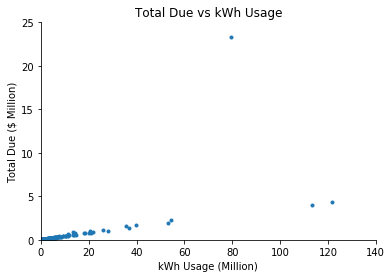

In [17]:
fig, ax = plt.subplots()
ax.plot(kWh_groupby_site['kWh Usage']/1000000, kWh_groupby_site['Total Due ($)']/1000000, '.')
ax.set_xlabel('kWh Usage (Million)')
ax.set_ylabel('Total Due ($ Million)')
ax.set_title('Total Due vs kWh Usage')
ax.set_ylim(0, 25)
ax.set_xlim(0, 140)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

Obviously, there is one outlier where total due is way higher than others. It is the site VARIOUS has that high total due.

In [18]:
kWh_groupby_site[kWh_groupby_site['Total Due ($)']>2e+7]

,Service Address,kWh Usage,Total Due ($)
5610,VARIOUS,79449482,23332024.48


Remove 1 outlier:

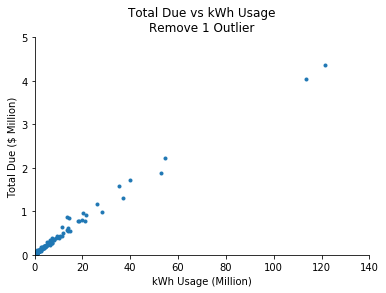

In [19]:
train1 = kWh_groupby_site[kWh_groupby_site['Total Due ($)']<2e+7]
fig, ax = plt.subplots()
ax.plot(train1['kWh Usage']/1000000, train1['Total Due ($)']/1000000, '.')
ax.set_xlabel('kWh Usage (Million)')
ax.set_ylabel('Total Due ($ Million)')
ax.set_title('Total Due vs kWh Usage\nRemove 1 Outlier')
ax.set_ylim(0, 5)
ax.set_xlim(0, 140)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

#### Condition 2: 3 outliers

We can also find that there are another two points of which kWh usage is much higher than others. The other two sites are 2500 69TH ST and  2500 FEDERAL RD respectively.

In [20]:
kWh_groupby_site[kWh_groupby_site['kWh Usage']>6e+7]

,Service Address,kWh Usage,Total Due ($)
2152,2500 69TH ST,113451767,4053100.70
2153,2500 FEDERAL RD,121636497,4358286.05
5610,VARIOUS,79449482,23332024.48


Remove 3 outliers:

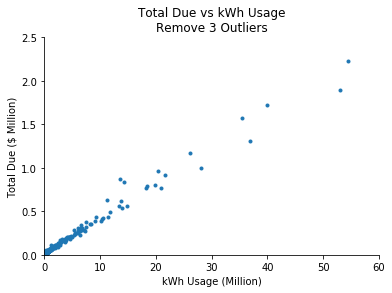

In [21]:
train2 = kWh_groupby_site[kWh_groupby_site['kWh Usage']<6e+7]
fig, ax = plt.subplots()
ax.plot(train2['kWh Usage']/1000000, train2['Total Due ($)']/1000000, '.')
ax.set_xlabel('kWh Usage (Million)')
ax.set_ylabel('Total Due ($ Million)')
ax.set_title('Total Due vs kWh Usage\nRemove 3 Outliers')
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 60)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [22]:
#bills[bills['Service Address']=='2500 FEDERAL RD'][['Service Address', 'Bill Date', 'kWh Usage', 'Total Due ($)']]

In [23]:
#bills[bills['Service Address']=='2500 69TH ST'][['Service Address', 'Bill Date', 'kWh Usage', 'Total Due ($)']]

### 3.3 Average due of kWh

#### Condition 1: remove 1 outlier

In [24]:
from sklearn.linear_model import LinearRegression

If we consider there is only 1 outlier, we can calculate the average due of kWh like this:

In [25]:
linear_regressor1 = LinearRegression()  # create object for the class
linear_regressor1.fit(train1[['kWh Usage']], train1['Total Due ($)'])
linear_regressor1.coef_

array([0.03779089])

In [26]:
print('The avarage due of kWh is: $%.4f.'%linear_regressor1.coef_[0])

The avarage due of kWh is: $0.0378.


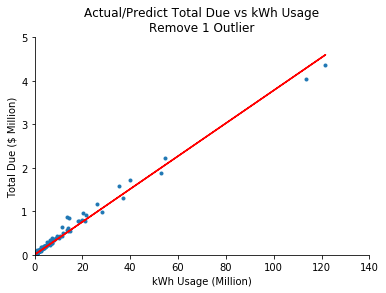

In [27]:
fig, ax = plt.subplots()
plt.plot(train1['kWh Usage']/1000000, train1['Total Due ($)']/1000000, '.')
plt.plot(train1['kWh Usage']/1000000, linear_regressor1.predict(train1[['kWh Usage']])/1000000, color='red')
plt.xlabel('kWh Usage (Million)')
plt.ylabel('Total Due ($ Million)')
ax.set_title('Actual/Predict Total Due vs kWh Usage\nRemove 1 Outlier')
ax.set_ylim(0, 5)
ax.set_xlim(0, 140)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

If we consider there are 3 outliers, we can calculate the average due of kWh in this way:

#### Condition 2: remove 3 outliers

In [28]:
linear_regressor2 = LinearRegression()  # create object for the class
linear_regressor2.fit(train2[['kWh Usage']], train2['Total Due ($)'])
linear_regressor2.coef_

array([0.04104018])

In [29]:
print('The avarage due of kWh is: $%.4f.'%linear_regressor2.coef_[0])

The avarage due of kWh is: $0.0410.


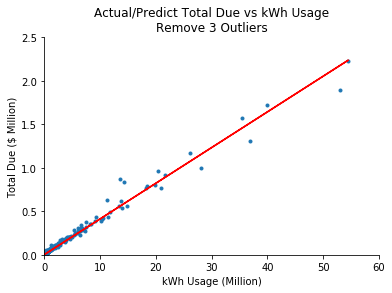

In [30]:
fig, ax = plt.subplots()
ax.plot(train2['kWh Usage']/1000000, train2['Total Due ($)']/1000000, '.')
ax.plot(train2['kWh Usage']/1000000, linear_regressor2.predict(train2[['kWh Usage']])/1000000, color='red')
ax.set_xlabel('kWh Usage (Million)')
ax.set_ylabel('Total Due ($ Million)')
ax.set_title('Actual/Predict Total Due vs kWh Usage\nRemove 3 Outliers')
ax.set_ylim(0, 2.5)
ax.set_xlim(0, 60)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

#### Compare two results

Here we see a difference between the two models. When excluding the two super high usage points, the average price is higher than including them. This makes sense when considering the 'spend more save more' marketing promotion.

### 3.4 kWh usage and cost by month

Extract month data:

In [31]:
bills['Month'] = bills['Bill Date'].apply(lambda x: x.month)
bills['Year-Month'] = bills['Bill Date'].apply(lambda x: str(x.year)+'-'+str('%02d' % x.month))
bills['Year-Month'].head()                                        

0    2016-07
1    2016-08
2    2016-09
3    2016-10
4    2016-11
Name: Year-Month, dtype: object

In [32]:
kWh_groupby_month = bills[['Year-Month', 'kWh Usage', 'Total Due ($)']].groupby(['Year-Month'], as_index=False).sum()
kWh_groupby_month

,Year-Month,kWh Usage,Total Due ($)
0,2016-07,95213824,6.137627e+06
1,2016-08,111111542,8.165075e+06
2,2016-09,116646947,9.614795e+06
3,2016-10,101993590,7.276628e+06
4,2016-11,94680872,6.196408e+06
5,2016-12,96060401,5.604977e+06
6,2017-01,100200329,6.936902e+06
7,2017-02,91595513,6.580829e+06
8,2017-03,98176374,8.687157e+06
9,2017-04,94970366,6.744696e+06


#### Month data bar chart & insights:

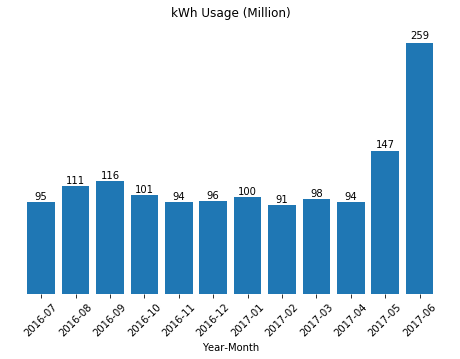

In [33]:
x = kWh_groupby_month['Year-Month']
y = kWh_groupby_month['kWh Usage']/1000000
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, y)
ax.set_xlabel('Year-Month')
ax.set_title('kWh Usage (Million)')
ax.xaxis.set_tick_params(rotation=45)
#ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_ylim(0, 280)

rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()*0.5, 1.01*height,
            '%d'%(height), ha='center', va='bottom')

plt.show()

In June 2017, the usage goes up incredibly, more than double of each month from July 2017 to April 2017. The rising tendency shows form May 2017.

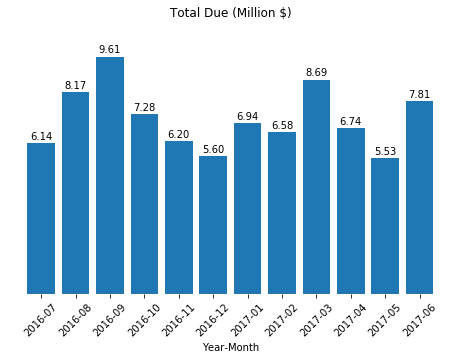

In [34]:
x = kWh_groupby_month['Year-Month']
y = kWh_groupby_month['Total Due ($)']/1000000
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, y)
ax.set_xlabel('Year-Month')
ax.set_title('Total Due (Million $)')
ax.xaxis.set_tick_params(rotation=45)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_ylim(0, 11)

rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()*0.5, 1.01*height,
            '%.2f'%(height), ha='center', va='bottom')

plt.show()

The total due flutuates every month. It is relatively higher in September 2016 and March 2017.
However, considering the high usage in June 2017, the total due in that month doesn't show a high value.

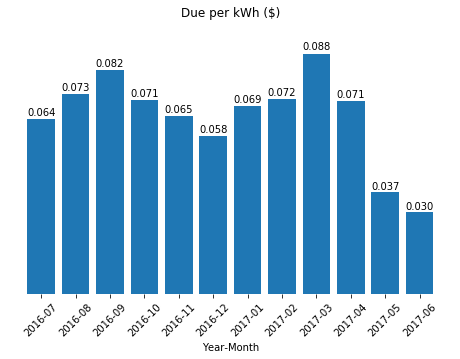

In [35]:
x = kWh_groupby_month['Year-Month']
y = kWh_groupby_month['Total Due ($)']/kWh_groupby_month['kWh Usage']
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x, y)
ax.set_xlabel('Year-Month')
ax.set_title('Due per kWh ($)')
ax.xaxis.set_tick_params(rotation=45)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_ylim(0, 0.1)

rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()*0.5, 1.01*height, '%.3f'%(height), ha='center', va='bottom')
    
plt.show()

In September 2016 and March 2017, the average price is higher than in other months. 

And the average price is way much lower from May 2017. The average price tuned down explains the rising from May 2017.